Data Loading

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import scvi
import anndata
import scipy

Global seed set to 0


In [2]:
sc.set_figure_params(dpi = 100, fontsize = 12, facecolor='white')

In [3]:
adata = sc.read_h5ad("/home/sakary/hamim/data/sce_full_Zhengmix4uneq.h5ad")

Pre-Processing

In [4]:
adata.var['mt']=adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'],percent_top=None,log1p=False,inplace=True)
sc.pp.filter_genes(adata, min_cells=3)

In [5]:
adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,dataset,barcode,phenoid,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,libsize.drop,feature.drop,n_genes_by_counts,total_counts_mt,pct_counts_mt
b.cells1147,0,1096.0,427,1,ACGGAGGACCGAAT-1,b.cells,427,2.631444,692.826433,3.040207,48.175182,66.788321,79.288321,100.000000,0,0,0,427,0.0,0.0
b.cells6276,0,857.0,340,1,GCAGCGTGCCGAAT-1,b.cells,340,2.532754,640.187617,2.933487,51.108518,69.078180,83.663944,100.000000,0,0,0,340,0.0,0.0
b.cells6144,0,1593.0,602,1,GATTTAGAGTGTAC-1,b.cells,602,2.780317,768.161829,3.202488,46.264909,63.025738,74.764595,93.596987,0,0,0,602,0.0,0.0
b.cells6285,0,743.0,410,1,GCAGCTCTAGAACA-1,b.cells,410,2.613842,729.371304,2.871573,42.799462,57.873486,71.736205,100.000000,0,0,0,410,0.0,0.0
b.cells8679,0,1031.0,411,1,TCAGTGGAGTTCAG-1,b.cells,411,2.614897,678.741835,3.013680,51.018429,67.313288,79.534433,100.000000,0,0,0,411,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regulatory.t14,0,1729.0,723,1,AAACATTGTGCCTC-1,regulatory.t,723,2.859739,845.879535,3.238046,41.122036,56.159630,69.172932,87.102371,0,0,0,723,0.0,0.0
regulatory.t814,0,1599.0,807,1,ACACGATGCAACTG-1,regulatory.t,807,2.907411,931.139367,3.204120,34.271420,46.529081,60.350219,80.800500,0,0,0,807,0.0,0.0
regulatory.t7537,0,895.0,499,1,GTAGGTACTCGATG-1,regulatory.t,499,2.698970,802.568308,2.952308,37.988827,51.508380,66.592179,100.000000,0,0,0,499,0.0,0.0
regulatory.t5577,0,1343.0,538,1,CTTTGATGAGGCGA-1,regulatory.t,538,2.731589,749.724672,3.128399,47.207744,62.695458,74.832465,97.170514,0,0,0,538,0.0,0.0


/home/sakary/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'barcode' as categorical
/home/sakary/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phenoid' as categorical
/home/sakary/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering cat

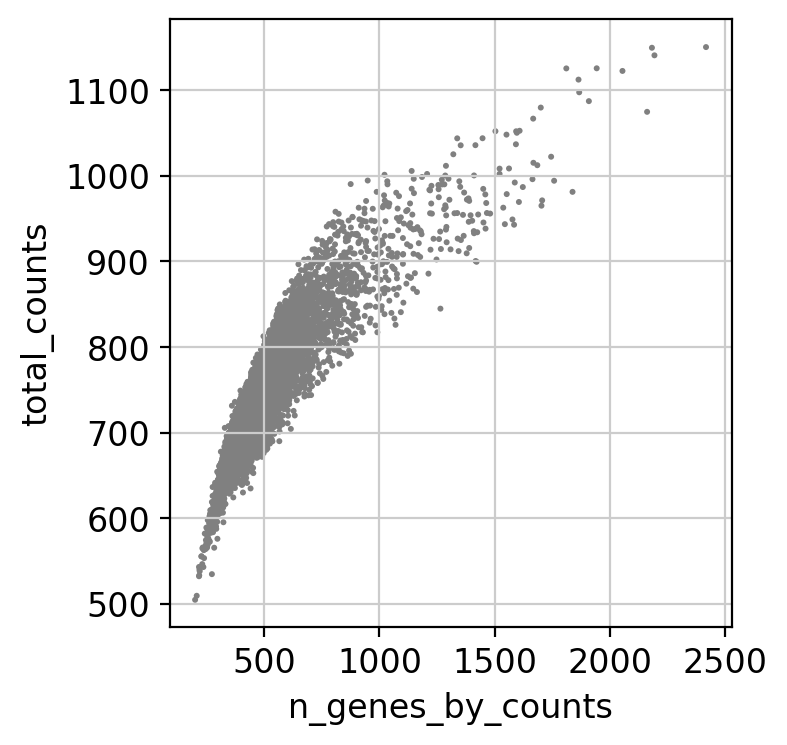

In [6]:
sc.pl.scatter(adata,"n_genes_by_counts","total_counts")

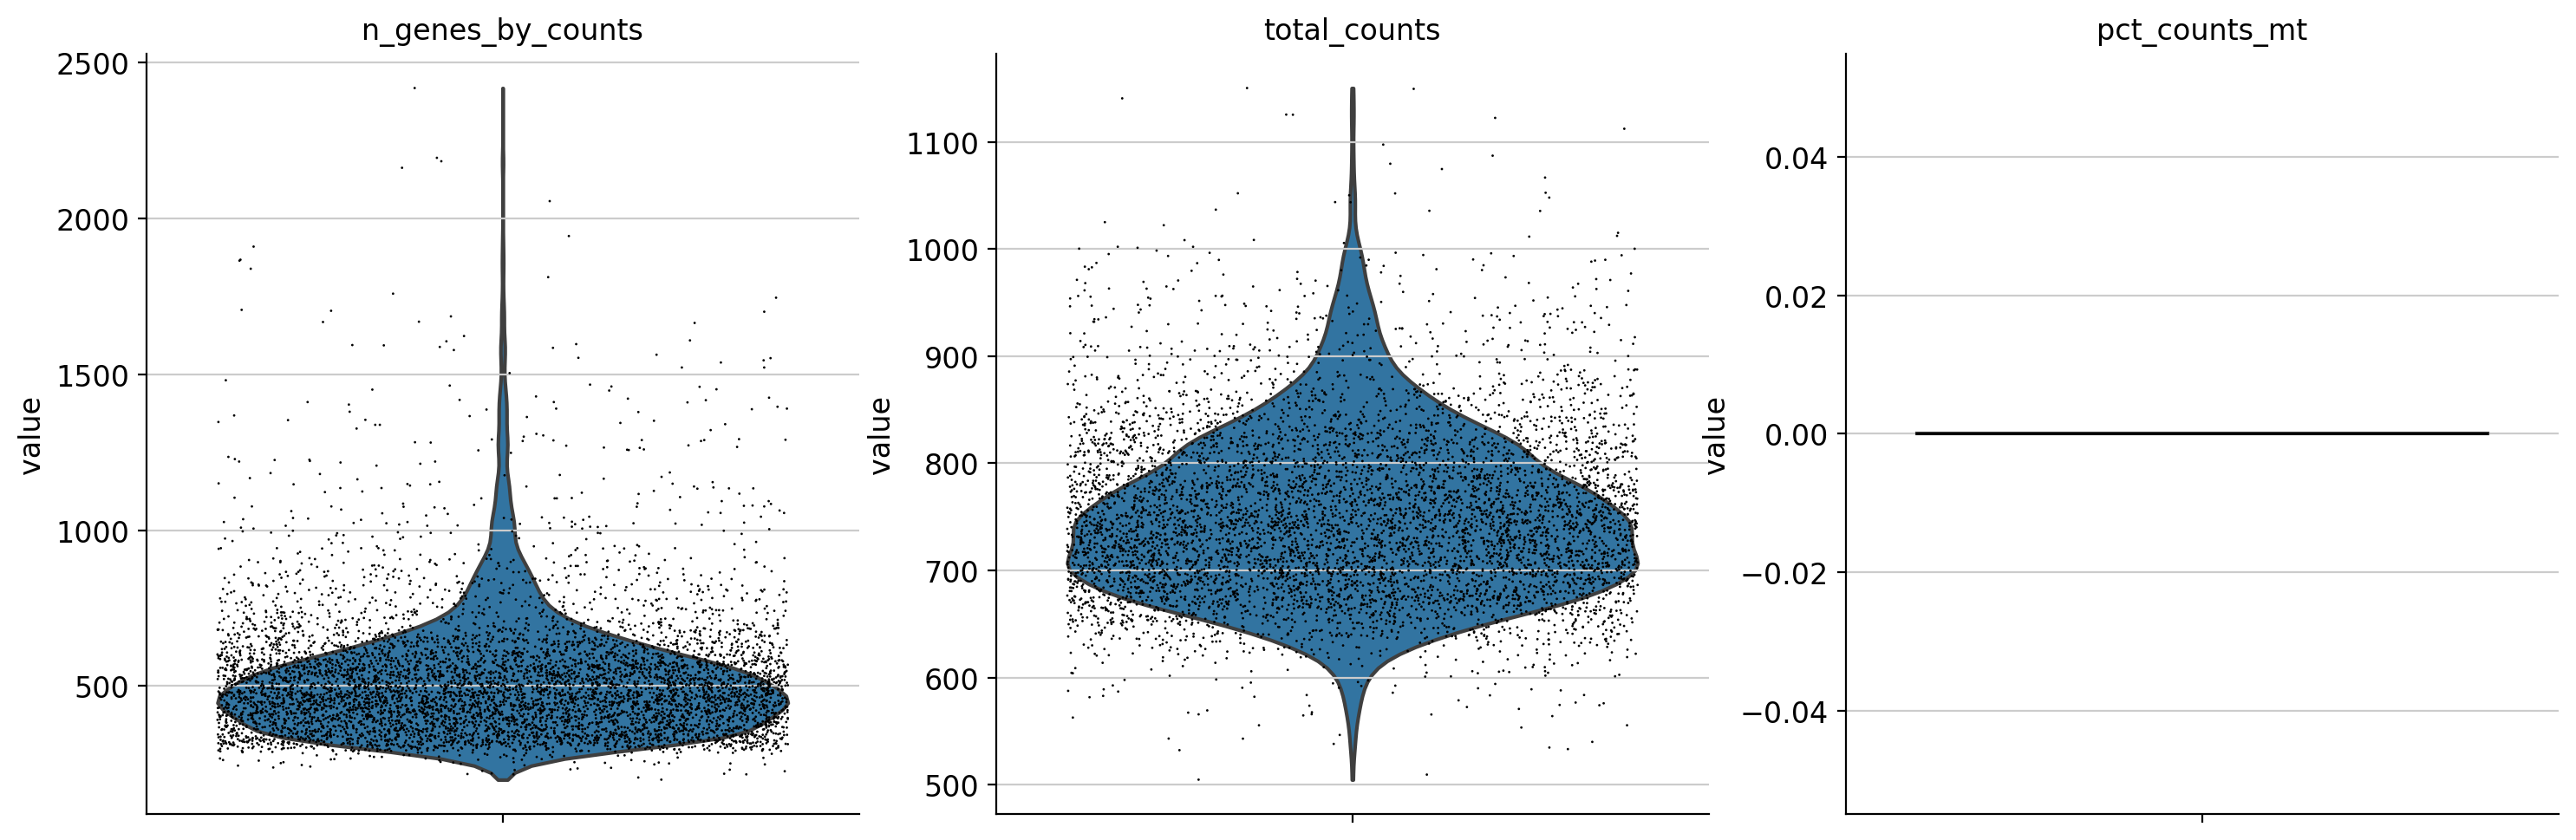

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [8]:
sc.pp.filter_cells(adata,max_genes=1500, inplace=True, copy=False)
sc.pp.filter_cells(adata,max_counts=1000, inplace=True, copy=False)

Normalization


In [9]:
adata.layers["counts"]=adata.X.copy()
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)
adata.raw=adata

In [10]:
sc.pp.highly_variable_genes(adata,n_top_genes=3500,layer="counts",flavor="seurat_v3")

/home/sakary/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [11]:
adata = adata[:, adata.var.highly_variable].copy()

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

In [13]:
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
import scanpy.external as sce
import matplotlib.pyplot as plt
import numba

Finding the right resolution

euclidean
correlation


<function matplotlib.pyplot.show(close=None, block=None)>

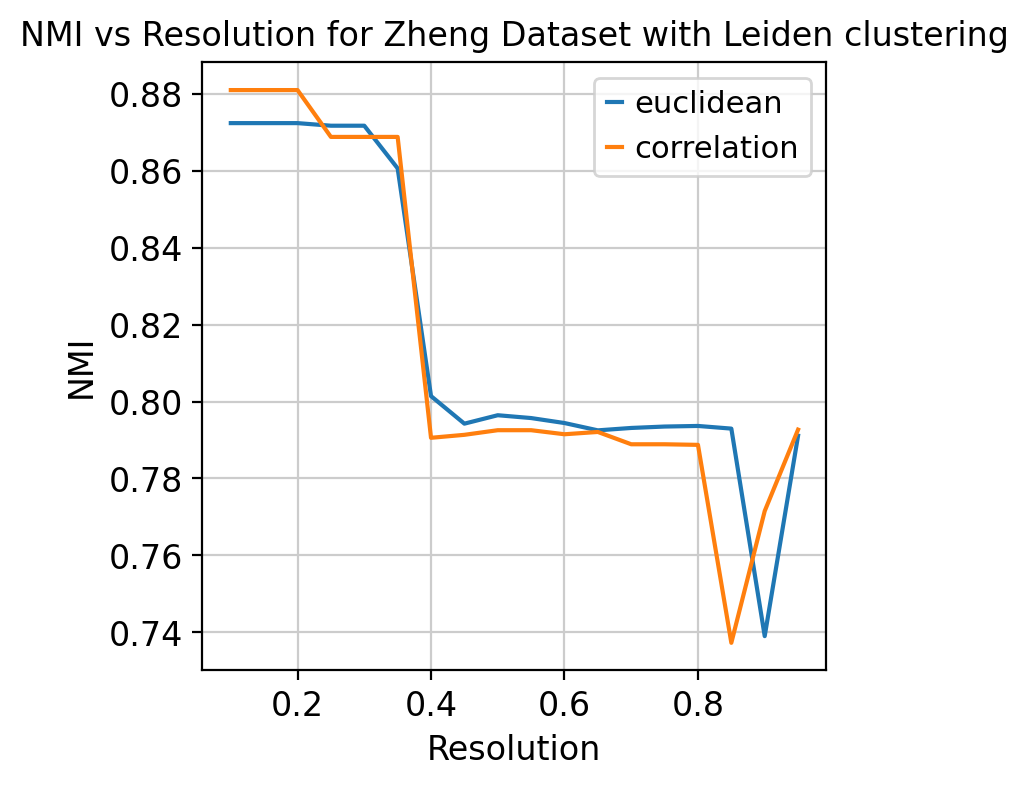

In [14]:
lst = ['euclidean', 'correlation']
lsteuc = []
lstcor = []
lstres = []
df = pd.DataFrame(columns=lst, index=['NMI'])
for x in lst:
    print(x)
    res = 0.1
    while res <= 1.0:
        lstres.append(res)
        sc.pp.neighbors(adata, metric=x)
        sc.tl.leiden(adata, resolution=res)
        if(x == 'euclidean'):
            lsteuc.append(normalized_mutual_info_score(
                adata.obs["phenoid"], adata.obs['leiden']))
        if(x == 'correlation'):
            lstcor.append(normalized_mutual_info_score(
                adata.obs["phenoid"], adata.obs['leiden']))
        res = res+0.05
lstres = lstres[:18]
plt.plot(lstres, lsteuc, label='euclidean')
plt.plot(lstres, lstcor, label='correlation')
plt.xlabel('Resolution')
plt.ylabel('NMI')
plt.title("NMI vs Resolution for Zheng Dataset with Leiden clustering")
plt.legend()
plt.show

Clustering

In [15]:
@numba.njit(fastmath=True)
def Polaratio(x, y):
    n = x.size
    num = 0
    for j in range(0, n):  # O(n^2)
        for i in range(0, j):
            num += max(0, (x[j] - x[i]) * (y[i] - y[j]))
    return num / (num + n * np.cov(x, y)[0][1])


Different Distance Matrices

In [16]:
lst = ['cosine', 'euclidean', 'correlation', 'manhattan',
        'braycurtis', 'canberra', 'chebyshev', 'minkowski']
df_low= pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
df_leiden = pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
df_mid = pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
for x in lst:
    print(x)
    if(x=='minkowski'):
        sc.pp.neighbors(adata, metric=x,metric_kwds={'p':0.5})
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x + '(0.5)'] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["ARI", x + '(0.5)'] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["FM", x + '(0.5)'] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.60)
        df_mid.at["NMI", x + '(0.5)'] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["ARI", x + '(0.5)'] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["FM", x + '(0.5)'] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        sc.pp.neighbors(adata, metric=x, metric_kwds={'p': 0.1})
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x + '(0.1)'] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["ARI", x + '(0.1)'] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["FM", x + '(0.1)'] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.60)
        df_mid.at["NMI", x + '(0.1)'] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["ARI", x + '(0.1)'] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["FM", x + '(0.1)'] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])
    else:
        sc.pp.neighbors(adata, metric=x)
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["ARI", x] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_low.at["FM", x] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.60)
        df_mid.at["NMI", x] = normalized_mutual_info_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["ARI", x] = adjusted_rand_score(
            adata.obs["phenoid"], adata.obs['leiden'])
        df_mid.at["FM", x] = fowlkes_mallows_score(
            adata.obs["phenoid"], adata.obs['leiden'])


cosine
euclidean
correlation
manhattan
braycurtis
canberra
chebyshev
minkowski


Polaratio

In [17]:
print("Polaratio")
sc.pp.neighbors(adata, metric=Polaratio)
sc.tl.leiden(adata, resolution=0.2)
df_low.at["NMI", "Polaratio"] = normalized_mutual_info_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_low.at["ARI", "Polaratio"] = adjusted_rand_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_low.at["FM", "Polaratio"] = fowlkes_mallows_score(
    adata.obs["phenoid"], adata.obs['leiden'])
sc.tl.leiden(adata, resolution=0.60)
df_mid.at["NMI", "Polaratio"] = normalized_mutual_info_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_mid.at["ARI", "Polaratio"] = adjusted_rand_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_mid.at["FM", "Polaratio"] = fowlkes_mallows_score(
    adata.obs["phenoid"], adata.obs['leiden'])


Polaratio


Geodesic

In [18]:
sc.pp.neighbors(adata,n_neighbors=50,metric="cosine")
bdata = adata.obsp["distances"]


In [19]:
cdata = scipy.sparse.csgraph.shortest_path(bdata, directed = False)

In [20]:
#adata.obsp["distances"] = cdata

In [21]:
cdata[1,:]

array([0.52635305, 0.        , 0.51613221, ..., 1.84957667, 1.67031101,
       1.77002274])

In [22]:
n = adata.X.shape[0]
for i in range(n):
    adata.obsm['X_pca'][i][49] = i

@numba.njit(nopython=False,fastmath=True)
def geodesic(A,B):
    global cdata
    return cdata[int(A[49])][int(B[49])]

/home/sakary/miniconda3/lib/python3.9/site-packages/numba/core/decorators.py:260: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [23]:
print("geodesic")
sc.pp.neighbors(adata, metric=geodesic)
sc.tl.leiden(adata, resolution=0.2)
df_low.at["NMI", "Geodesic"] = normalized_mutual_info_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_low.at["ARI", "Geodesic"] = adjusted_rand_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_low.at["FM", "Geodesic"] = fowlkes_mallows_score(
    adata.obs["phenoid"], adata.obs['leiden'])
sc.tl.leiden(adata, resolution=0.60)
df_mid.at["NMI", "Geodesic"] = normalized_mutual_info_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_mid.at["ARI", "Geodesic"] = adjusted_rand_score(
    adata.obs["phenoid"], adata.obs['leiden'])
df_mid.at["FM", "Geodesic"] = fowlkes_mallows_score(
    adata.obs["phenoid"], adata.obs['leiden'])

print(df_low)
print(df_mid)
# print(df_louvain)


geodesic


/home/sakary/miniconda3/lib/python3.9/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "generate_leaf_updates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/home/sakary/miniconda3/lib/python3.9/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/home/sakary/miniconda3/lib/python3.9/site-packages/pynndescent/pynndescent_.py:336: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/home/sakary/miniconda3/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "generate_graph_updates

       cosine euclidean correlation manhattan braycurtis  canberra chebyshev  \
NMI  0.880229  0.872349    0.880935  0.872349   0.875188   0.64555  0.880229   
ARI  0.836517  0.833461    0.837062  0.833461   0.834681  0.529273  0.836517   
FM    0.90124  0.899224    0.901572  0.899224   0.900029  0.756518   0.90124   

    minkowski  minkowski(0.5)  minkowski(0.1)  Polaratio  Geodesic  
NMI       NaN        0.875943        0.517935   0.875727  0.993672  
ARI       NaN        0.834987        0.304217   0.835669  0.996781  
FM        NaN        0.900230        0.674489   0.900629  0.997864  
       cosine euclidean correlation manhattan braycurtis  canberra chebyshev  \
NMI  0.793791  0.794405    0.791489  0.805796   0.791483  0.859661  0.802435   
ARI  0.689639  0.693702    0.679895  0.741687   0.697177  0.828642  0.717427   
FM   0.787233  0.790125     0.78028  0.824086   0.792603  0.896084  0.806978   

    minkowski  minkowski(0.5)  minkowski(0.1)  Polaratio  Geodesic  
NMI       NaN

In [24]:
df_low.to_excel('zheng_low.xlsx')
df_mid.to_excel('zheng_mid.xlsx')